In [8]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

from PIL import Image
import cv2

In [9]:
df = pd.read_csv('mphb_datasets.csv', dtype={'idx': str})
print(len(df))
df.head(7)

29732


,idx,filename,type,xmin,xmax,ymin,ymax,class,label
0,00001,000001163.jpg,MPII,467.965438,591.836406,84.739631,476.997696,standing,0
1,00001,000001163.jpg,MPII,521.052995,712.758065,120.131336,606.767281,standing,0
2,00002,000003072.jpg,MPII,358.841014,512.205069,78.841014,612.665899,standing,0
3,00002,000003072.jpg,MPII,591.836406,898.564516,123.080645,597.919355,standing,0
4,00003,000004812.jpg,MPII,1312.205069,1825.384793,471.928571,1069.163594,bent,4
5,00004,000005283.jpg,MPII,852.112903,1152.942396,7.412442,755.062212,standing,0
6,00004,000005283.jpg,MPII,1183.910138,1467.043779,11.836406,909.900922,standing,0


In [10]:
print(len(df['idx'].unique()))

26675


In [11]:
df[df['filename'] == '015601864.jpg']

,idx,filename,type,xmin,xmax,ymin,ymax,class,label
5120,03797,015601864.jpg,MPII,541.698157,712.758065,102.435484,447.504608,bent,4
5121,03797,015601864.jpg,MPII,836.629032,1028.334101,140.776498,456.352535,bent,4


In [12]:
def draw_bbox(img, xmin, ymin, xmax, ymax):
    img_ = img.copy()
    return cv2.rectangle(img, (xmin, ymin), (xmax, ymax), thickness=4, color=(255, 0, 0))

In [18]:
filenames = df.idx.values
bboxes = df[['xmin', 'ymin', 'xmax', 'ymax']].astype('int32').values
print(bboxes, len(bboxes))

[[467  84 591 476]
 [521 120 712 606]
 [358  78 512 612]
 ...
 [ 20   5 143 136]
 [  6  12  61 161]
 [ 13   1  56 187]] 29732


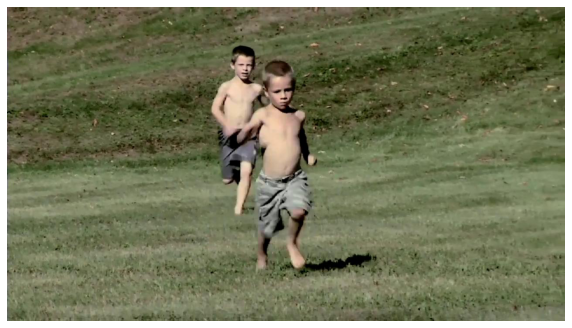

In [20]:
img = np.array(Image.open('/home/namirinz/Downloads/images_MPHB/'+filenames[0]+'.jpg'))
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

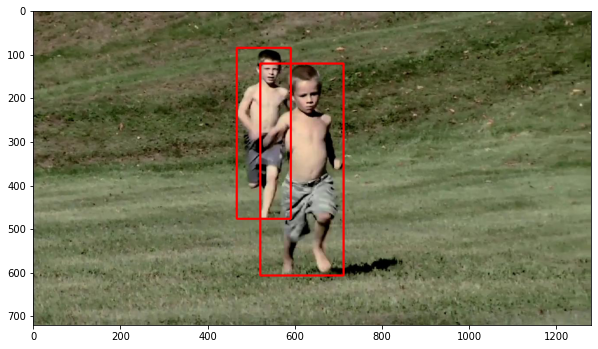

In [22]:
img_input = img.copy()
for i in range(2):
    img_ = draw_bbox(img_input, *bboxes[i])

plt.figure(figsize=(10, 10))
plt.imshow(img_)
#plt.axis('off')
plt.show()